# CSE HW1
#### Yawen Zhao   A53280596

In [1]:
import gzip
path = "./amazon_reviews_us_Gift_Card_v1_00.tsv.gz"
f = gzip.open(path, 'rt')
dataset = []
# Read the header:
header = f.readline().strip().split('\t')
for line in f:
    # Separate by tabs
    line = line.split('\t')
    # Convert to key-value pairs
    d = dict(zip(header, line))
    # Convert strings to integers for some fields:
    d['star_rating'] = int(d['star_rating'])
    d['helpful_votes'] = int(d['helpful_votes'])
    d['total_votes'] = int(d['total_votes'])
    dataset.append(d)
print(dataset[0])

{'marketplace': 'US', 'customer_id': '24371595', 'review_id': 'R27ZP1F1CD0C3Y', 'product_id': 'B004LLIL5A', 'product_parent': '346014806', 'product_title': 'Amazon eGift Card - Celebrate', 'product_category': 'Gift Card', 'star_rating': 5, 'helpful_votes': 0, 'total_votes': 0, 'vine': 'N', 'verified_purchase': 'Y', 'review_headline': 'Five Stars', 'review_body': 'Great birthday gift for a young adult.', 'review_date': '2015-08-31\n'}


In [2]:
rating = []
for i in range(5):
    X = [d for d in dataset if d['star_rating'] == i + 1]
    rating.append(len(X))

1.	The distribution of ratings in the dataset is showing as following:

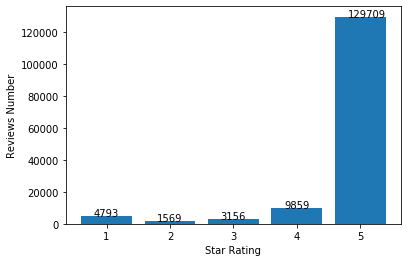

In [23]:
import matplotlib.pyplot as plt

plt.figure()
bars = plt.bar(range(1, len(rating)+1), rating)
plt.xlabel('Star Rating')
plt.ylabel('Reviews Number')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.2, yval, yval)
plt.show()


In [4]:
import numpy

def feature1(data):
    feat = [1]
    if data['verified_purchase'] == 'Y':
        feat.append(1);
    else:
        feat.append(0);
    feat.append(len(data['review_body']))
    return feat

def feature2(data):
    feat = [1]
    if data['verified_purchase'] == 'Y':
        feat.append(1);
    else:
        feat.append(0);
    return feat

def get1Xy(dataset):
    X = [feature1(d) for d in dataset]
    y = [d['star_rating'] for d in dataset]
    return X, y

def get2Xy(dataset):
    X = [feature2(d) for d in dataset]
    y = [d['star_rating'] for d in dataset]
    return X, y

In [5]:
X, y = get1Xy(dataset)
theta1, residuals1, rank1, s1 = numpy.linalg.lstsq(X,y)

In [6]:
theta1

array([  4.84461817e+00,   5.04148265e-02,  -1.24659895e-03])

3. The value of $\theta_0 = 4.84461817e+00,\theta_1 = 5.04148265e-02,\theta_2 = -1.24659895e-03$.
   
   $\theta_0$ indicates the rating which is unverified and with no review body. $\theta_1$ indicates as if the review is verified, the ratings will increase by 5.04148265e-02. If the review is unverified, the ratings will not increase. $\theta_2$ indicates as if the review length is 1 character longer, the rating will decrease 1.24659895e-03. Conversely, if the review length is 1 character shorter, the rating will increase 1.24659895e-03.

In [7]:
X, y = get2Xy(dataset)
theta2, residuals2, rank2, s2 = numpy.linalg.lstsq(X,y)

In [8]:
theta2

array([ 4.57758356,  0.16852426])

4. The value of $\theta_0 = 4.57758356,\theta_1 = 0.16852426$

   $\theta_0$ indicates the rating when the review is unverified. $\theta_1$ indicates as if the review is verified, the ratings will increase by 0.16852426. Even though the coefficients represent the same feature, the model is being changed. As in question 3, the model of rating is represented not only by whether the rating is verified or not, but also represent by the length of the rating. Hence the model in question judge the rating in a different dimension and thus the coefficients are changes.

In [9]:
def splitData(dataset, percent):
    size = len(dataset)
    trainset = dataset[0 : int(size * percent)]
    testset = dataset[int(size * percent + 1): size]
    trainX, trainY = get2Xy(trainset)
    testX, testY = get2Xy(testset)
    return trainX, trainY, testX, testY

In [10]:
def f(theta, X, y):
  theta = numpy.matrix(theta).T
  X = numpy.matrix(X)
  y = numpy.matrix(y).T
  diff = X*theta - y
  diffSq = diff.T*diff
  diffSqReg = diffSq / len(X)
  return diffSqReg.flatten().tolist()[0]

In [11]:
trainX, trainY, testX, testY = splitData(dataset, 0.9)
theta, residuals, rank, s = numpy.linalg.lstsq(trainX,trainY)
trainYexpect = (theta * trainX).sum(axis = 1)
testYexpect = (theta * testX).sum(axis = 1)
errortrain = f(theta, trainX, trainY)
errortest = f(theta, testX, testY)
print(errortrain, errortest)

[0.6557415620281448] [0.9714261885960263]


5.	The model’s MSE on training data is 0.6557415620281802. MSE on testing data is 0.9714261885960409.

In [12]:
MSEtrain = []
MSEtest = []
for i in numpy.arange(0.05, 1, 0.05):
    trainX, trainY, testX, testY = splitData(dataset, i)
    theta, residuals, rank, s = numpy.linalg.lstsq(trainX,trainY)
    trainYexpect = (theta * trainX).sum(axis = 1)
    testYexpect = (theta * testX).sum(axis = 1)
    errortrain = f(theta, trainX, trainY)
    errortest = f(theta, testX, testY)
#     cur = numpy.square(numpy.subtract(testY,testYexpect)).mean() 
    MSEtrain.append(errortrain)
    MSEtest.append(errortest)
    print(theta)
    print(sum(trainY)/len(trainY))
    

[ 4.24159021  0.51539028]
4.73437080762007
[ 4.17520661  0.57365726]
4.7255835792862895
[ 4.17248908  0.5911032 ]
4.739379304176729
[ 4.26117441  0.52080355]
4.76204849582453
[ 4.3159486   0.47102147]
4.770250328673768
[ 4.32080201  0.46678871]
4.770933482392398
[ 4.30258824  0.48596436]
4.768761977769261
[ 4.31482255  0.47483136]
4.770583895093403
[ 4.3244983   0.46809096]
4.774162294300024
[ 4.33368347  0.45442316]
4.770696108286493
[ 4.33039946  0.45238966]
4.766491457004524
[ 4.33430045  0.44009184]
4.759130697253245
[ 4.31461703  0.45065618]
4.750033538001135
[ 4.31936713  0.44290417]
4.747786508240705
[ 4.32141875  0.43898318]
4.746123025739174
[ 4.35384987  0.40728803]
4.746989972163531
[ 4.36104807  0.39868313]
4.744482059294682
[ 4.43657178  0.31944366]
4.740626187796717
[ 4.59653784  0.15858289]
4.742055058567686


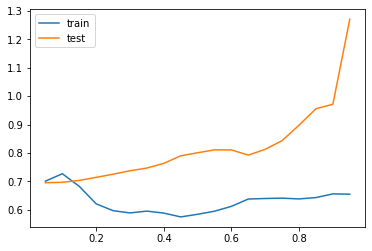

In [13]:
plt.plot(numpy.arange(0.05, 1, 0.05), MSEtrain, label="train")
plt.plot(numpy.arange(0.05, 1, 0.05), MSEtest, label="test")
plt.legend(loc='upper left')  

7. The figure above shows the training and test error vary as a function of the training set size. The size of the training set makes a big difference of the testing performance. As the size of training set increases, the error rate of testing data increases. This is because that the data is not shuffled. According to the predictor, the prediction of the data will be very high, around 4.65. As more data shown in training set, the training model reaches a much higher average value. However, the review with less start rating and are not verified shows more on the end of the data, which will increase the MSE.

In [14]:
import random 
def feature(data):
    feat = [1]
    feat.append(data['star_rating'])
    feat.append(len(data['review_body']))
    feat.append(len(data['review_headline']))
    return feat

def res(data):
    if (data['verified_purchase'] == 'Y'):
        return 1
    else:
        return 0

def getXy(dataset):
    X = [feature(d) for d in dataset]
    y = [res(d) for d in dataset]
    return X, y

def splitData(dataset, percent):
    size = len(dataset)
#     random.shuffle(dataset)
    trainset = dataset[0 : int(size * percent)]
    testset = dataset[int(size * percent + 1): size]
    trainX, trainY = getXy(trainset)
    testX, testY = getXy(testset)
    return trainX, trainY, testX, testY

In [15]:
from sklearn.linear_model import LogisticRegression

trainX, trainY, testX, testY = splitData(dataset, 0.9)
clf = LogisticRegression(solver='lbfgs').fit(trainX, trainY)

In [16]:
trainscore = clf.score(trainX, trainY)
testscore = clf.score(testX, testY)
print(trainscore, testscore)

0.951608695976 0.55889455326


In [17]:
predict_train = clf.predict(trainX)
predict_test = clf.predict(testX)
verified_label = (sum(trainY) + sum(testY)) / len(dataset)
verified_prediction = (sum(predict_train) + sum(predict_test)) / len(dataset)
print(verified_label, verified_prediction)
verified_label_train = sum(trainY) / len(trainY)
verified_prediction_train = sum(predict_train) / len(trainY)
print(verified_label_train, verified_prediction_train)
verified_label_test = sum(testY) / len(testY)
verified_prediction_test = sum(predict_test) / len(testY)
print(verified_label_test, verified_prediction_test)

0.9125068752263794 0.99957742511
0.9518248283983097 0.999649716419
0.5586933190233432 0.998993828817


8. 
The classification accuracy of the predictor on training dataset is 0.951608695976, that on testing dataset is 0.55889455326. 

The proportion of labels for all data that are positive is 0.9125068752263794. And the proportion of predictions for all data that are positive is 0.99957742511.

The proportion of labels for train data that are positive is 0.9518248283983097. And the proportion of predictions for all data that are positive is 0.999649716419.

The proportion of labels for test data that are positive is 0.5586933190233432. And the proportion of predictions for test data that are positive is 0.998993828817.

In [18]:
import random

def feature_2(data):
    feat = [1]
    feat.append(data['star_rating'])
    feat.append(len(data['review_body']))
    feat.append(len(data['review_headline']))
    feat.append(data['helpful_votes']);
    feat.append(data['total_votes']);
    return feat

def res(data):
    if (data['verified_purchase'] == 'Y'):
        return 1
    else:
        return 0

def getXy_2(dataset):
    X = [feature_2(d) for d in dataset]
    y = [res(d) for d in dataset]
    return X, y

def splitData_2(dataset, percent):
    size = len(dataset)
#     random.shuffle(dataset)
    trainset = dataset[0 : int(size * percent)]
    testset = dataset[int(size * percent + 1): size]
    trainX, trainY = getXy_2(trainset)
    testX, testY = getXy_2(testset)
    return trainX, trainY, testX, testY

def splitData_3(dataset, percent):
    size = len(dataset)
    random.shuffle(dataset)
    trainset = dataset[0 : int(size * percent)]
    testset = dataset[int(size * percent + 1): size]
    trainX, trainY = getXy_2(trainset)
    testX, testY = getXy_2(testset)
    return trainX, trainY, testX, testY

In [19]:
from sklearn.linear_model import LogisticRegression

trainX2, trainY2, testX2, testY2 = splitData_2(dataset, 0.9)
clf_2 = LogisticRegression(solver='lbfgs').fit(trainX2, trainY2)

In [20]:
trainscore2 = clf_2.score(trainX2, trainY2)
testscore2 = clf_2.score(testX2, testY2)
print(trainscore2, testscore2)

0.951631054503 0.559229943654


In [21]:
from sklearn.linear_model import LogisticRegression

trainX3, trainY3, testX3, testY3 = splitData_3(dataset, 0.9)
clf_3 = LogisticRegression(solver='lbfgs').fit(trainX3, trainY3)

In [22]:
trainscore3 = clf_3.score(trainX3, trainY3)
testscore3 = clf_3.score(testX3, testY3)
print(trainscore3, testscore3)

0.910364667566 0.914475449423


9. The feature I design is 

$p$(review is verified)$ \approx \sigma (\theta_0$ $ + \theta_1 *$ [star rating] $ + \theta_2 *$ [review length] $ + \theta_3 *$ [review headline length] $ + \theta_4 *$ [helpful votes] $ + \theta_5 *$ [total votes])

For adding the feature to the model, we can get a better accuracy with the train accuracy is 0.951631054503. The test accuracy 0.559229943654. The increasement of accuracy is because that we use more feature to better describe the model.

As we shuffled the data then, the train accuracy is 0.910364667566. The test accuracy 0.914475449423. Though the accuracy of training data decrease a little bit, the accuracy of testing data increases. This is because of the shuffled data. As we shuffled the data, we can train the model in a more general way, which will have more accuracy on testing data.